# INTRODUCTION
1. Read datas
2. Poverty rate of each state
3. Most common 15 Name or Surname
4. High school graduation rate of the population that is older than 25 in states
5. Percentage of state's population according to races that are black, white, native american, asian and hispanic
6. High school graduation rate vs Poverty rate of each state
7. Kill properties
    + Manner of death
    + Kill weapon
    + Age of killed people
    + Race of killed people
    + Most dangerous cities
    + Most dangerous state
    + Having mental ilness or not for killed people
    + Threat types
    + Flee types
    + Having body cameras or not for police
8. Race rates according to states in kill data
9. Kill numbers from states in kill data
10. Plotly Visualization Tutorial : http://www.kaggle.com/kancaa1/plotly-tutorial-for-begginers

   Plot contents:
11. [Bar Plot](#1)
12. [Point Plot](#2)
13. [Join Plot](#3)
14. [Pie Plot](#4)
15. [Lm Chart](#5)
16. [Kde Plot](#6)
1.  [Violin Plot](#7)
1.  [Heatmap](#8)
17. [Box Plot](#9)
18. [Swarm Plot](#10)
19. [Pair Plot](#11)
20. [Count Plot](#12)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
# Read Datas
median_house = pd.read_csv("csv/MedianHouseholdIncome2015.csv",encoding="windows-1252")
percentage_people = pd.read_csv("csv/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percent_over = pd.read_csv("csv/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
share_race = pd.read_csv("csv/ShareRaceByCity.csv",encoding="windows-1252")
kill = pd.read_csv("csv/PoliceKillingsUS.csv",encoding="windows-1252")

In [3]:
percentage_people.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
percentage_people.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
88.2       1
68.2       1
70.5       1
76.6       1
73.5       1
Name: poverty_rate, Length: 771, dtype: int64

<a id=1><br>
# Bar Plot

In [6]:
percentage_people["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Text(0.5, 1.0, 'Poverty Rate Given States')

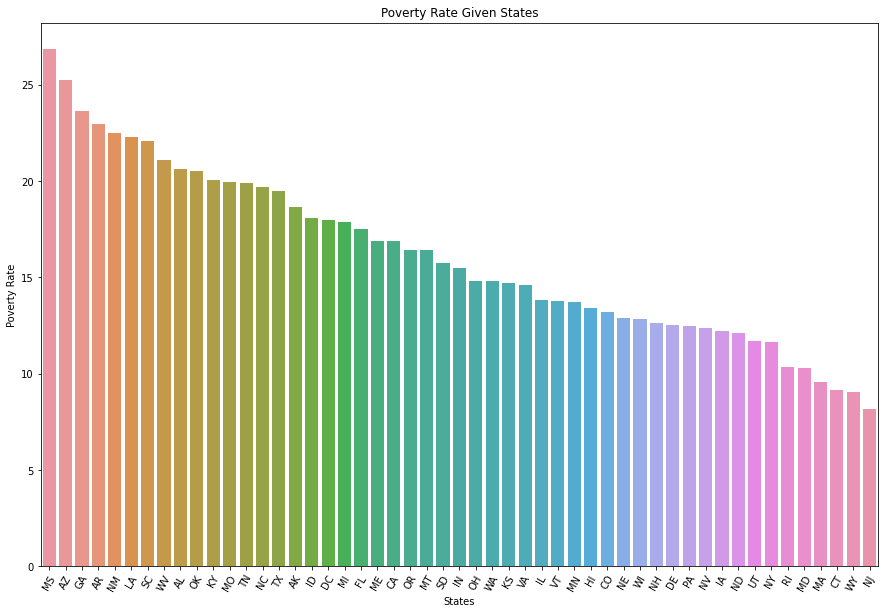

In [7]:
# Poverty rate of each state
percentage_people.poverty_rate.replace(["-"],0.0,inplace=True)
percentage_people.poverty_rate = percentage_people.poverty_rate.astype(float)
area_list = list(percentage_people["Geographic Area"].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people[percentage_people["Geographic Area"]==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({"area_list":area_list,"area_poverty_ratio":area_poverty_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(15,10))
ax = sns.barplot(x=sorted_data["area_list"],y=sorted_data["area_poverty_ratio"])
plt.xticks(rotation = 60)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

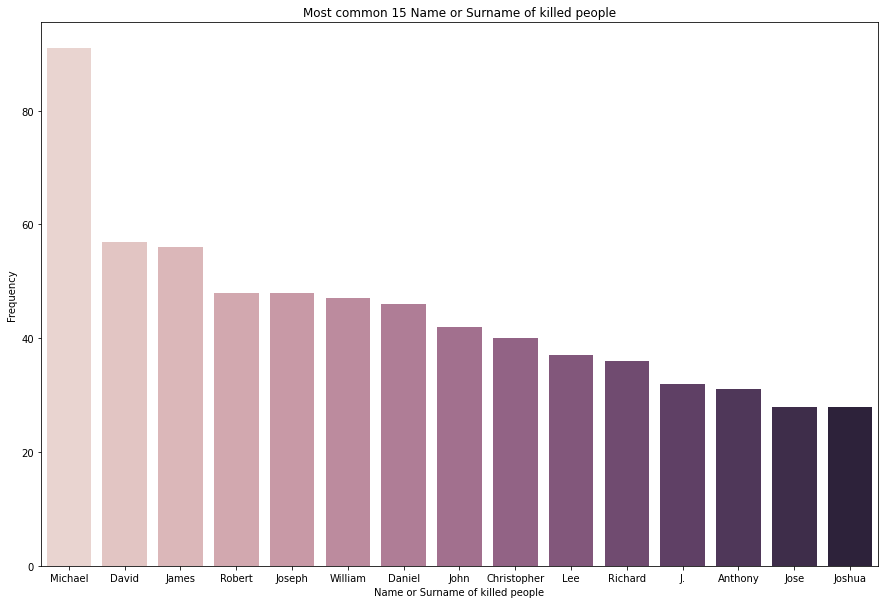

In [9]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != "TK TK"].str.split()
a, b = zip(*separate)
name_list = a + b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
ax = sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x)))
plt.xlabel("Name or Surname of killed people")
plt.ylabel("Frequency")
plt.title("Most common 15 Name or Surname of killed people")

In [10]:
percent_over.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


Text(0, 0.5, 'Hihg School Graduate Rate')

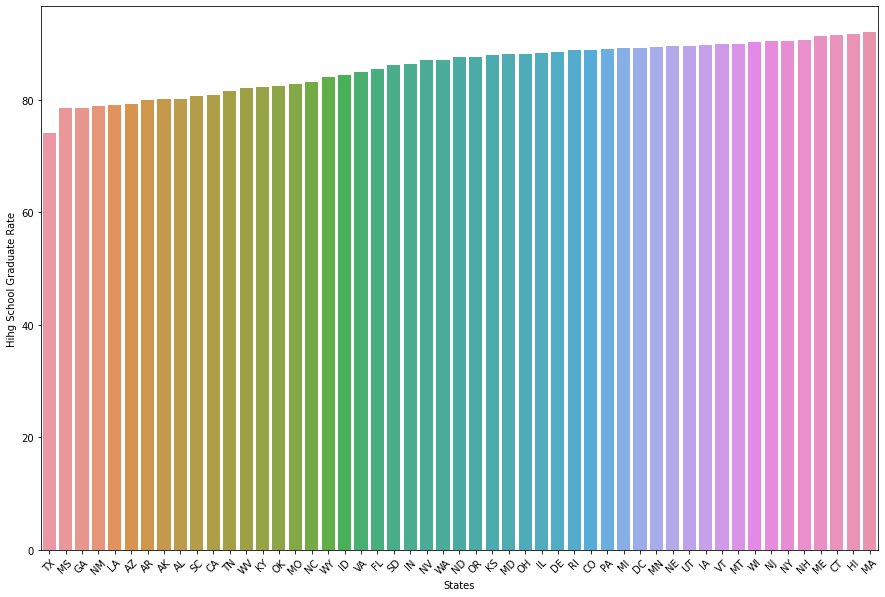

In [11]:
# High school graduation rate of the population that is older than 25 in states

percent_over.percent_completed_hs.replace(["-"],0.0,inplace=True)
percent_over.percent_completed_hs = percent_over.percent_completed_hs.astype(float)
area_list = list(percent_over["Geographic Area"].unique())

area_highschool = []
for i in area_list:
    x = percent_over[percent_over["Geographic Area"]==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
#sorting
data = pd.DataFrame({"area_list":area_list,"area_highschool_ratio":area_highschool})
new_index = (data["area_highschool_ratio"].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
#visualization
plt.figure(figsize=(15,10))
ax = sns.barplot(x=sorted_data2["area_list"],y=sorted_data2["area_highschool_ratio"])
plt.xticks(rotation=45)
plt.xlabel("States")
plt.ylabel("Hihg School Graduate Rate")


In [12]:
share_race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [13]:
share_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0.5, 0, 'Percent of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According Races")]

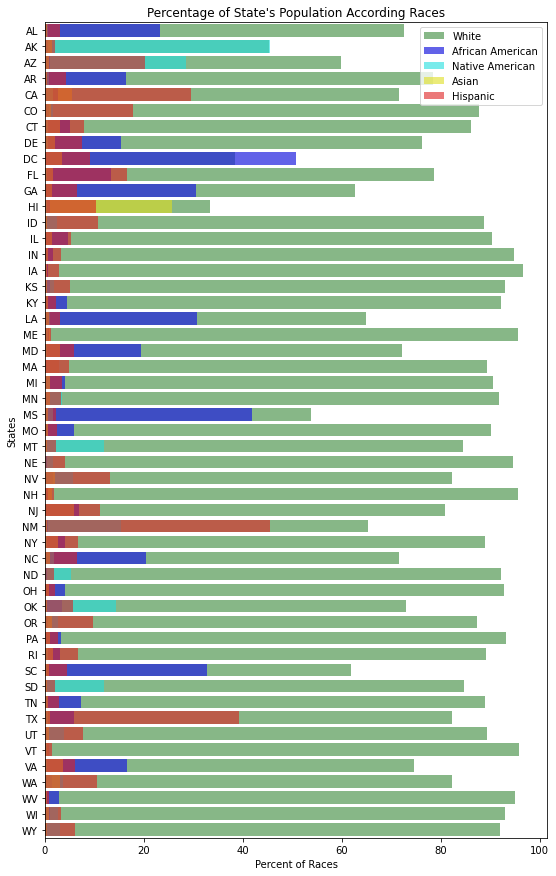

In [14]:
# Percentage of state's population according to race that are black, white, native american, asian and hispanic
share_race.replace(["-"],0.0,inplace=True)
share_race.replace(["(X)"],0.0,inplace=True)
share_race.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]] = share_race.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)

area_list = list(share_race["Geographic area"].unique())

share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

for i in area_list:
    x = share_race[share_race["Geographic area"]==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

f,ax = plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=area_list,color="green",alpha=0.5,label="White")
sns.barplot(x=share_black,y=area_list,color="blue",alpha=0.7,label="African American")
sns.barplot(x=share_native_american,y=area_list,color="cyan",alpha=0.6,label="Native American")
sns.barplot(x=share_asian,y=area_list,color="yellow",alpha=0.6,label="Asian")
sns.barplot(x=share_hispanic,y=area_list,color="red",alpha=0.6,label="Hispanic")

ax.legend(loc="upper right",frameon=True)
ax.set(xlabel="Percent of Races",ylabel="States",title="Percentage of State's Population According Races")

In [15]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


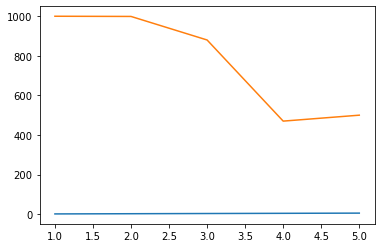

In [16]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
y1 = [1000,999,880,470,500] # normalize olmadığnda aşağıdaki grafik elde edilir
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

In [17]:
data.head()

,area_list,area_highschool_ratio
0,AL,80.163419
1,AK,80.098028
2,AZ,79.218182
3,AR,79.949538
4,CA,80.824639


<a id=2><br>
# Point Plot 

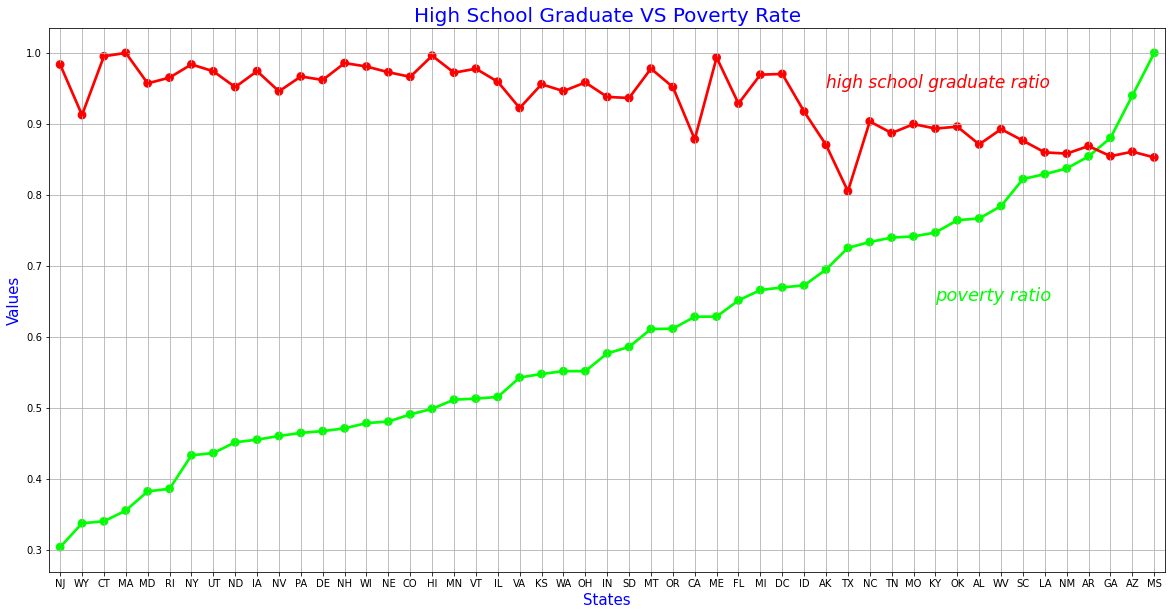

In [18]:
# high school graduation rate vs poverty rate of each state
# sorted data of basic normalization
sorted_data["area_poverty_ratio"] = sorted_data["area_poverty_ratio"]/max(sorted_data["area_poverty_ratio"])
sorted_data2["area_highschool_ratio"] = sorted_data2["area_highschool_ratio"]/max(sorted_data2["area_highschool_ratio"])

data = pd.concat([sorted_data,sorted_data2["area_highschool_ratio"]],axis=1)
data.sort_values("area_poverty_ratio",inplace=True)

# visualize
f, ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x="area_list",y="area_poverty_ratio",data=data,color="lime",alpha=0.8)
sns.pointplot(x="area_list",y="area_highschool_ratio",data=data,color="red",alpha=0.8)
plt.text(35,0.95,'high school graduate ratio',color="red",fontsize=17,style="italic")
plt.text(40,0.65,'poverty ratio',color='lime',fontsize=18,style="italic")
plt.xlabel("States",fontsize=15,color="blue")
plt.ylabel("Values",fontsize=15,color="blue")
plt.title("High School Graduate VS Poverty Rate",fontsize=20,color="blue")
plt.grid()

<a id=3><br>
# Joint Plot

/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


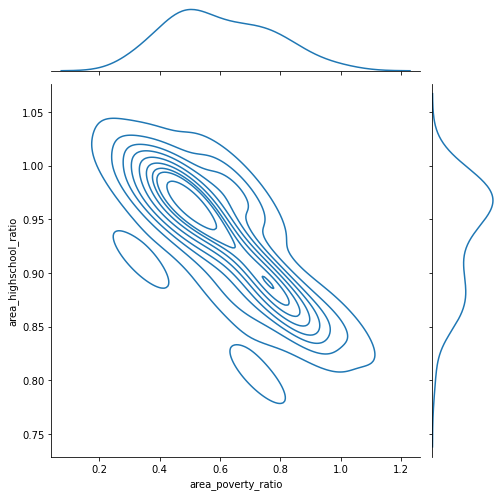

In [19]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# join kernel density
# pearson = if it is 1 ,there is pasitive correlation and if itis, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel densitiy estimation
x = "area_poverty_ratio"
y = "area_highschool_ratio"
g = sns.jointplot(x, y, data=data, kind = "kde", height=7)
plt.savefig('graph.png')
plt.show()

/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


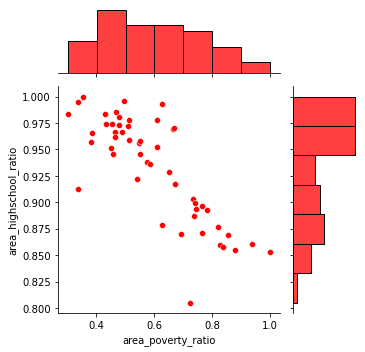

In [20]:
# you can change parameters of joint plot
# kind : {"scatter" | "reg" | "resid" | "kde" | "hex"}
# Different usage of parametrs but same plot with previous one
g = sns.jointplot(x,y,data=data,height=5,ratio=3,color="r")

<a id=4><br>
# Pie Chart 

In [21]:
kill.race.head()

0    A
1    W
2    H
3    W
4    H
Name: race, dtype: object

In [22]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

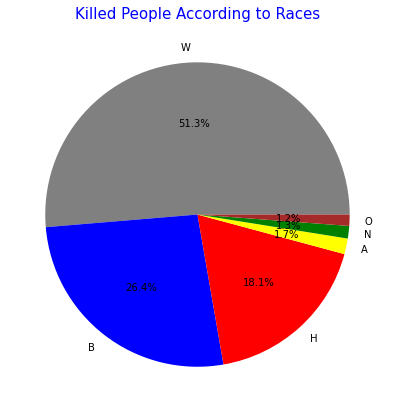

In [23]:
# Race rates according in kill data
kill.race.dropna(inplace=True)
labels = kill.race.value_counts().index
colors = ["grey","blue","red","yellow","green","brown"]
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Killed People According to Races",color = "blue", fontsize = 15)

<a id=5><a><br>
# Lm Plot

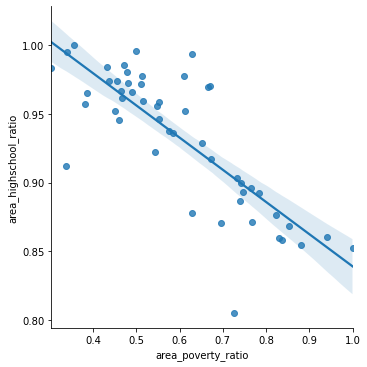

In [24]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lm plot
# show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio",y="area_highschool_ratio",data=data)
plt.show()

<a id=6><a><br>
# Kde Plot

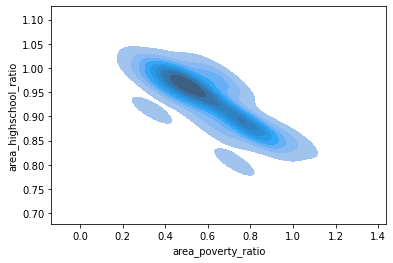

In [25]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(x="area_poverty_ratio",y="area_highschool_ratio",data=data,shade=True,cut=5)
plt.show()

<a id=7><a><br>
# Violin Plot

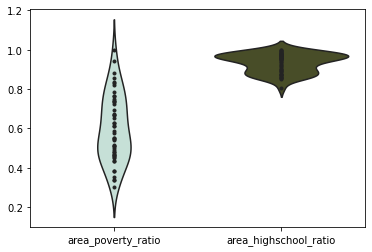

In [31]:
# Show each distribution with both violins and points
# use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot = -5, dark = .3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

<a id=8><a><br>
# Heatmap

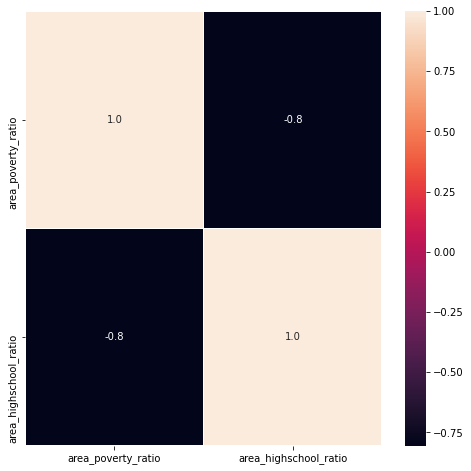

In [34]:
# correlation map
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

<a id=9><a><br>
# Box Plot

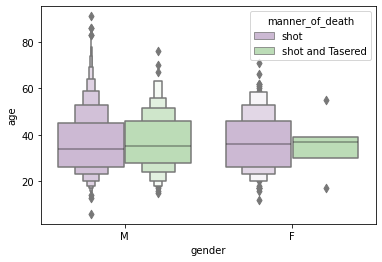

In [35]:
# manner of death(olum-sekli) : silah ile , sok tabancası ile
# gender . cinsiyet
# age . yas
# plot the orbital period with horizontal boxes
sns.boxenplot(x="gender",y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

<a id=10><a><br>
# Swarm Plot

/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


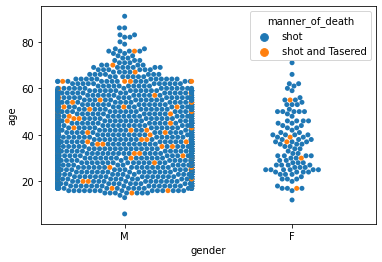

In [37]:
# manner of death(olum-sekli) : silah ile , sok tabancası ile
# gender . cinsiyet
# age . yas
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data = kill)
plt.show()

<a id=11><a><br>
# Pair Plot

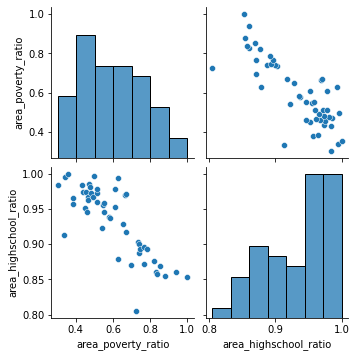

In [38]:
# fakirlik orani - lise mezun olma orani
sns.pairplot(data)
plt.show()

<a id=12><a><br>
# Count Plot

In [40]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [41]:
kill.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'gender')

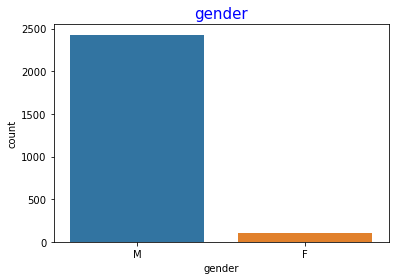

In [45]:
# kill properties
# manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color="blue",fontsize=15)

Text(0.5, 1.0, 'Kill Weapon')

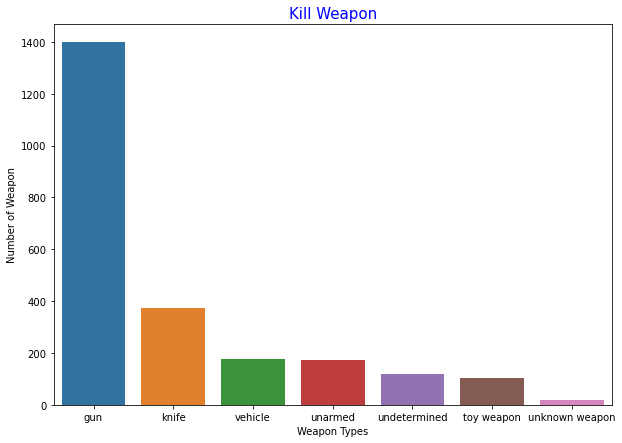

In [47]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)

plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel("Number of Weapon")
plt.xlabel("Weapon Types")
plt.title("Kill Weapon", color="blue", fontsize=15)

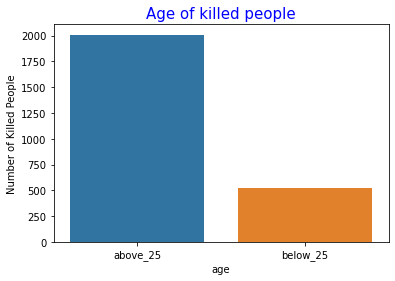

In [52]:
# age of killed people
above25 = ["above_25" if i >= 25 else "below_25" for i in kill.age]
df = pd.DataFrame({"age":above25})
sns.countplot(x=df.age)
plt.ylabel("Number of Killed People")
plt.title("Age of killed people", color = "blue", fontsize=15)
plt.show()

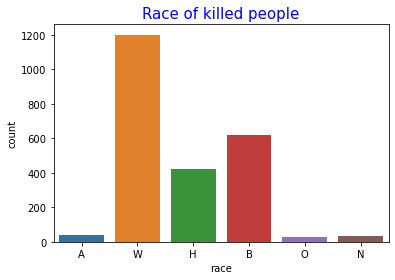

In [51]:
# Race of killed people
sns.countplot(data=kill, x="race")
plt.title("Race of killed people",color="blue",fontsize=15)
plt.show()

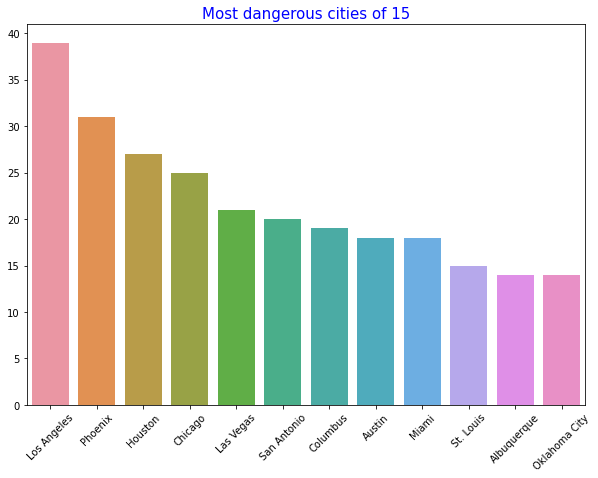

In [54]:
# Most dangerous cities
city = kill.city.value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation = 45)
plt.title("Most dangerous cities of 15", color = "blue", fontsize=15)
plt.show()

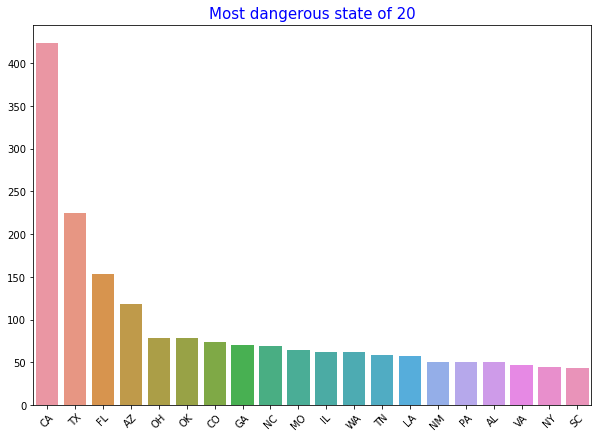

In [56]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.xticks(rotation = 45)
plt.title("Most dangerous state of 20", color = "blue", fontsize=15)
plt.show()